In [17]:
!pip install vmdpy

Looking in indexes: https://mirrors.aliyun.com/pypi/simple

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

# 读取MAT文件   
data1 = loadmat('0_0.mat')  # 正常信号
data2 = loadmat('21_1.mat') # 0.021英寸 内圈
data3 = loadmat('21_2.mat') # 0.021英寸 滚珠
data4 = loadmat('21_3.mat') # 0.021英寸 外圈
# 注意，读取出来的data是字典格式，可以通过函数type(data)查看。 

In [3]:
file_names = ['0_0.mat','21_1.mat','21_2.mat','21_3.mat']

for file in file_names:
    # 读取MAT文件
    data = loadmat(f'matfiles/{file}')
    print(list(data.keys()))

['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X209_DE_time', 'X209_FE_time', 'X209_BA_time', 'X209RPM']
['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM']
['__header__', '__version__', '__globals__', 'X234_DE_time', 'X234_FE_time', 'X234_BA_time', 'X234RPM']


In [4]:
# DE - drive end accelerometer data 驱动端加速度数据
data_list1 = data1['X097_DE_time'].reshape(-1) 
data_list2 = data2['X209_DE_time'].reshape(-1)  
data_list3 = data3['X222_DE_time'].reshape(-1) 
data_list4 = data4['X234_DE_time'].reshape(-1) 

time_step= 1024
# 划窗取值（大多数窗口大小为1024）
data_list1 = data_list1[0:time_step]
data_list2 = data_list2[0:time_step]
data_list3 = data_list3[0:time_step]
data_list4 = data_list4[0:time_step]

x_list = [x for x in range(time_step)]

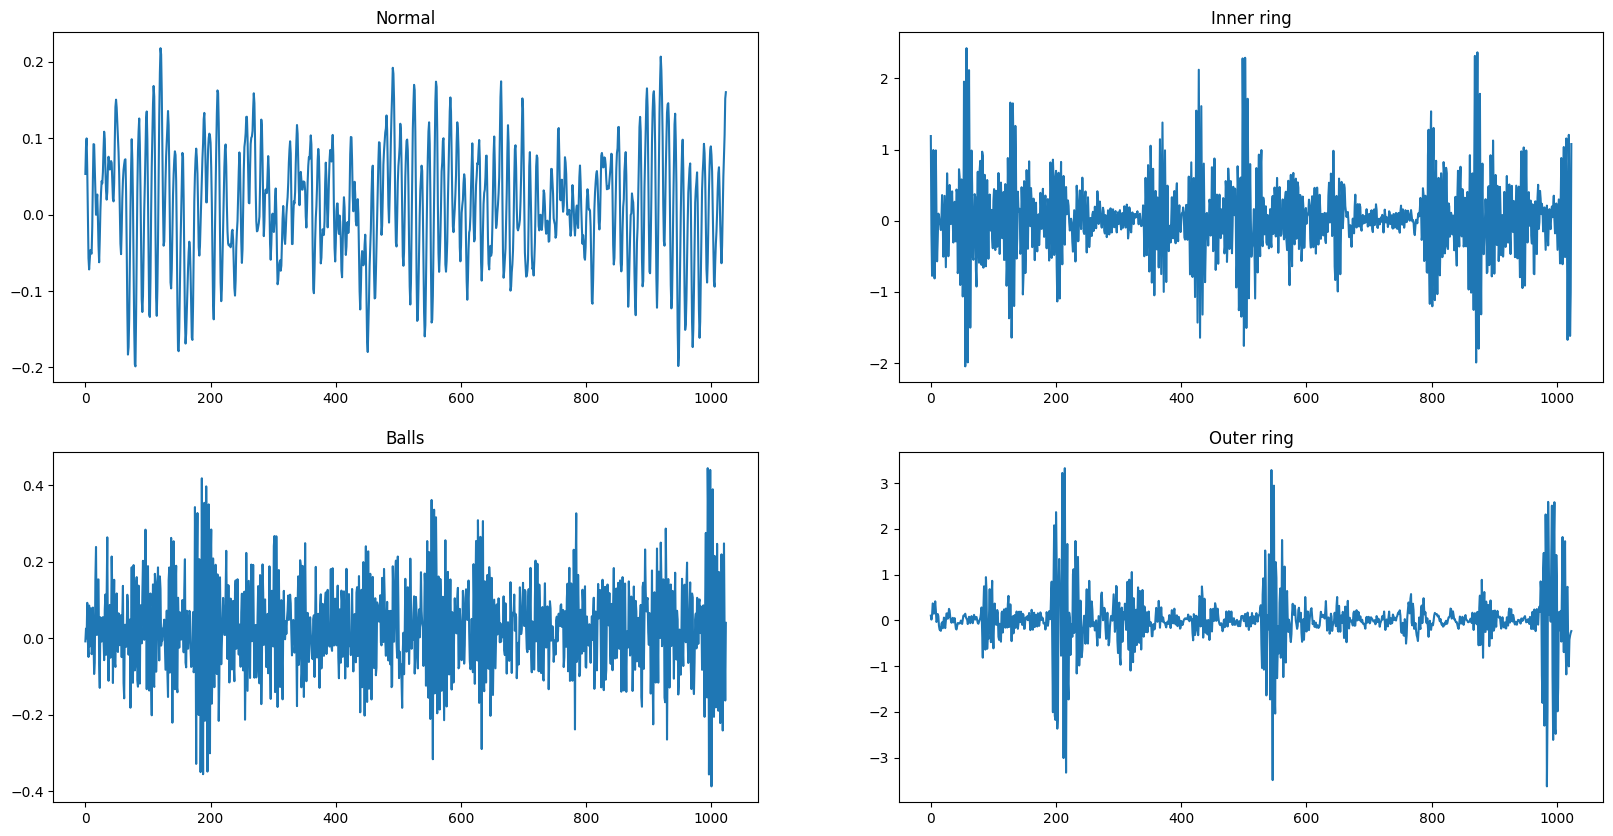

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(data_list1)
plt.title('Normal')
plt.subplot(2,2,2)
plt.plot(data_list2)
plt.title('Inner ring')
plt.subplot(2,2,3)
plt.plot(data_list3)
plt.title('Balls')
plt.subplot(2,2,4)
plt.plot(data_list4)
plt.title('Outer ring')

plt.show()

[0.00465295 0.01997751 0.00186648 0.00569143 0.02431567]


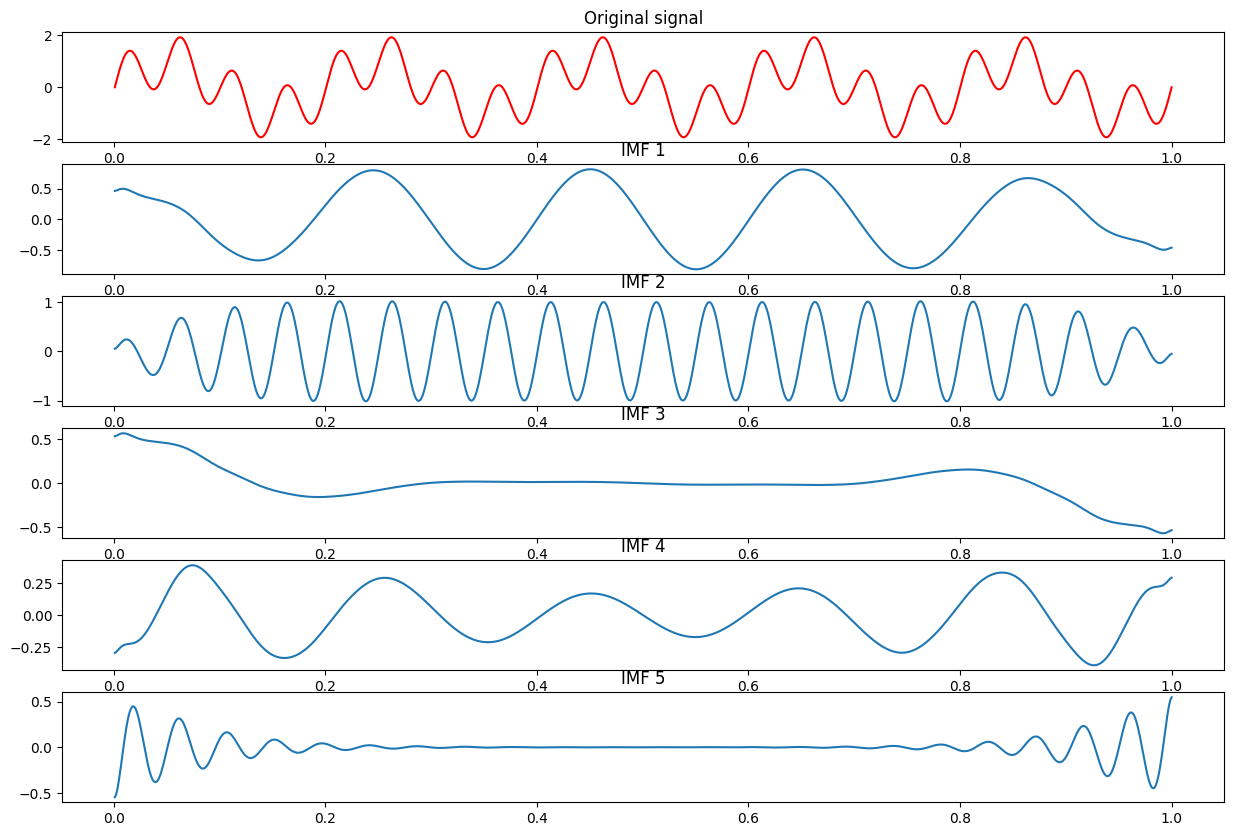

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

# -----测试信号及其参数--start-------------
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t)

T = len(signal)
fs = 1/T
t = np.arange(1,T+1)/T

# alpha 惩罚系数；带宽限制经验取值为抽样点长度1.5-2.0倍.
# 惩罚系数越小，各IMF分量的带宽越大，过大的带宽会使得某些分量包含其他分量言号;
alpha = 2000

#噪声容限，一般取 0, 即允许重构后的信号与原始信号有差别。
tau = 0 
#模态数量  分解模态（IMF）个数
K = 5

#DC 合成信号若无常量，取值为 0；若含常量，则其取值为 1
# DC 若为0则让第一个IMF为直流分量/趋势向量
DC = 0 

#初始化ω值，当初始化为 1 时，均匀分布产生的随机数
# init 指每个IMF的中心频率进行初始化。当初始化为1时，进行均匀初始化。
init = 1 

#控制误差大小常量，决定精度与迭代次数
tol = 1e-7
# -----测试信号及其参数--end----------

# Apply VMD
# 输出U是各个IMF分量，u_hat是各IMF的频谱，omega为各IMF的中心频率
u, u_hat, omega= VMD(signal, alpha, tau, K, DC, init, tol)

#得到中心频率的数值
print(omega[-1])

# Plot the original signal and decomposed modes
plt.figure(figsize=(15,10))
plt.subplot(K+1, 1, 1)
plt.plot(t, signal, 'r')
plt.title("Original signal")

for num in range(K):
    plt.subplot(K+1, 1, num+2)
    plt.plot(t, u[num,:])
    plt.title("IMF "+str(num+1))

plt.show()


根据不同K值条件下， 观察中心频率，选定K值

In [20]:
import pandas as pd
data = np.array(data_list1)
alpha = 2000
tau = 0 
DC = 0 
init = 1 
tol = 1e-7

#模态数量  分解模态（IMF）个数
K1 = 3
K2 = 4
K3 = 5
K4 = 6
K5 = 7
K6 = 8


u, u_hat, omega1= VMD(data, alpha, tau, K1, DC, init, tol)
u, u_hat, omega2= VMD(data, alpha, tau, K2, DC, init, tol)
u, u_hat, omega3= VMD(data, alpha, tau, K3, DC, init, tol)
u, u_hat, omega4= VMD(data, alpha, tau, K4, DC, init, tol)
u, u_hat, omega5= VMD(data, alpha, tau, K5, DC, init, tol)
u, u_hat, omega6= VMD(data, alpha, tau, K6, DC, init, tol)

# 创建 DataFrame 对象，每个列表一行
df = pd.DataFrame([omega1[-1], omega2[-1], omega3[-1], omega4[-1], omega5[-1], omega6[-1]])
print(df)

          0         1         2         3         4         5         6  \
0  0.011738  0.174702  0.086801       NaN       NaN       NaN       NaN   
1  0.011733  0.086802  0.174703  0.405032       NaN       NaN       NaN   
2  0.010914  0.087198  0.174796  0.057418  0.405494       NaN       NaN   
3  0.010912  0.087196  0.174782  0.057417  0.251832  0.405817       NaN   
4  0.010870  0.087081  0.057129  0.174907  0.110899  0.254912  0.405950   
5  0.010867  0.087080  0.057122  0.174878  0.110809  0.211514  0.263161   

          7  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5  0.406069  


根据不同K值条件下， 观察中心频率，选定K值；从K=4开始出现中心频率相近的模态，出现过分解，故模态数 K 选为4。

In [21]:
import pandas as pd
data = np.array(data_list2)
alpha = 2000
tau = 0 
DC = 0 
init = 1 
tol = 1e-7

#模态数量  分解模态（IMF）个数
K1 = 3
K2 = 4
K3 = 5
K4 = 6
K5 = 7
K6 = 8


u, u_hat, omega1= VMD(data, alpha, tau, K1, DC, init, tol)
u, u_hat, omega2= VMD(data, alpha, tau, K2, DC, init, tol)
u, u_hat, omega3= VMD(data, alpha, tau, K3, DC, init, tol)
u, u_hat, omega4= VMD(data, alpha, tau, K4, DC, init, tol)
u, u_hat, omega5= VMD(data, alpha, tau, K5, DC, init, tol)
u, u_hat, omega6= VMD(data, alpha, tau, K6, DC, init, tol)

# 创建 DataFrame 对象，每个列表一行
df = pd.DataFrame([omega1[-1], omega2[-1], omega3[-1], omega4[-1], omega5[-1], omega6[-1]])
print(df)

          0         1         2         3         4         5         6  \
0  0.043560  0.236134  0.266168       NaN       NaN       NaN       NaN   
1  0.043506  0.226564  0.243765  0.268429       NaN       NaN       NaN   
2  0.043373  0.160354  0.226870  0.243876  0.268476       NaN       NaN   
3  0.043353  0.159727  0.226055  0.241340  0.257506  0.271628       NaN   
4  0.038094  0.052532  0.225789  0.241097  0.256634  0.269270  0.281271   
5  0.037975  0.052207  0.160166  0.226060  0.241181  0.256692  0.269302   

          7  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5  0.281322  


In [22]:
import pandas as pd
data = np.array(data_list4)
alpha = 2000
tau = 0 
DC = 0 
init = 1 
tol = 1e-7

#模态数量  分解模态（IMF）个数
K1 = 3
K2 = 4
K3 = 5
K4 = 6
K5 = 7
K6 = 8


u, u_hat, omega1= VMD(data, alpha, tau, K1, DC, init, tol)
u, u_hat, omega2= VMD(data, alpha, tau, K2, DC, init, tol)
u, u_hat, omega3= VMD(data, alpha, tau, K3, DC, init, tol)
u, u_hat, omega4= VMD(data, alpha, tau, K4, DC, init, tol)
u, u_hat, omega5= VMD(data, alpha, tau, K5, DC, init, tol)
u, u_hat, omega6= VMD(data, alpha, tau, K6, DC, init, tol)

# 创建 DataFrame 对象，每个列表一行
df = pd.DataFrame([omega1[-1], omega2[-1], omega3[-1], omega4[-1], omega5[-1], omega6[-1]])
print(df)

          0         1         2         3         4         5         6  \
0  0.047354  0.231351  0.289877       NaN       NaN       NaN       NaN   
1  0.046951  0.116529  0.231411  0.289884       NaN       NaN       NaN   
2  0.046938  0.116268  0.231220  0.284667  0.301020       NaN       NaN   
3  0.046909  0.115342  0.219405  0.234612  0.285073  0.301370       NaN   
4  0.044911  0.059386  0.117298  0.231023  0.277480  0.289129  0.303372   
5  0.044886  0.059246  0.116339  0.219031  0.234247  0.278478  0.289520   

          7  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5  0.303655  


In [23]:
import pandas as pd
data = np.array(data_list3)
alpha = 2000
tau = 0 
DC = 0 
init = 1 
tol = 1e-7

#模态数量  分解模态（IMF）个数
K1 = 3
K2 = 4
K3 = 5
K4 = 6
K5 = 7
K6 = 8


u, u_hat, omega1= VMD(data, alpha, tau, K1, DC, init, tol)
u, u_hat, omega2= VMD(data, alpha, tau, K2, DC, init, tol)
u, u_hat, omega3= VMD(data, alpha, tau, K3, DC, init, tol)
u, u_hat, omega4= VMD(data, alpha, tau, K4, DC, init, tol)
u, u_hat, omega5= VMD(data, alpha, tau, K5, DC, init, tol)
u, u_hat, omega6= VMD(data, alpha, tau, K6, DC, init, tol)

# 创建 DataFrame 对象，每个列表一行
df = pd.DataFrame([omega1[-1], omega2[-1], omega3[-1], omega4[-1], omega5[-1], omega6[-1]])
print(df)

          0         1         2         3         4         5         6  \
0  0.001694  0.240427  0.275680       NaN       NaN       NaN       NaN   
1  0.001498  0.119013  0.273552  0.354527       NaN       NaN       NaN   
2  0.001462  0.118464  0.240509  0.275524  0.355052       NaN       NaN   
3  0.000675  0.052621  0.235466  0.267448  0.282201  0.355427       NaN   
4  0.000605  0.050972  0.120285  0.240607  0.275479  0.353422  0.377064   
5  0.000599  0.050917  0.120178  0.235937  0.267488  0.282177  0.353951   

          7  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5  0.378781  


[0.01173266 0.08680216 0.17470306 0.40503188]


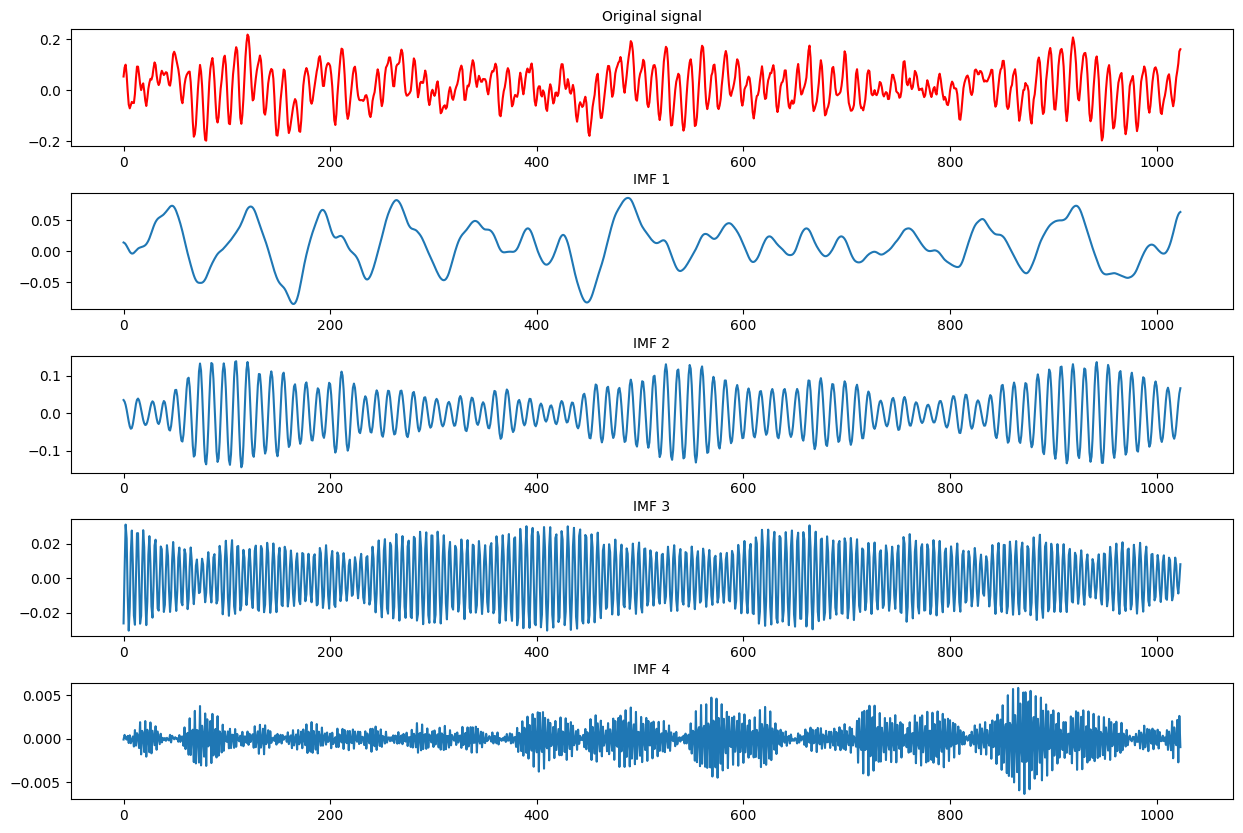

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

data = np.array(data_list1)
# alpha 惩罚系数；带宽限制经验取值为抽样点长度1.5-2.0倍.
# 惩罚系数越小，各IMF分量的带宽越大，过大的带宽会使得某些分量包含其他分量言号;
alpha = 2000
tau = 0 
#模态数量  分解模态（IMF）个数
K = 4
DC = 0 
init = 1 
tol = 1e-7
# -----测试信号及其参数--end----------

# Apply VMD
# 输出U是各个IMF分量，u_hat是各IMF的频谱，omega为各IMF的中心频率
u, u_hat, omega= VMD(data, alpha, tau, K, DC, init, tol)

#得到中心频率的数值
print(omega[-1])

# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(K+1, 1, 1)
plt.plot(data, 'r')
plt.title("Original signal", fontsize=10)

for num in range(K):
    plt.subplot(K+1, 1, num+2)
    plt.plot(u[num,:])
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()


[0.04350632 0.22656407 0.24376451 0.2684285 ]


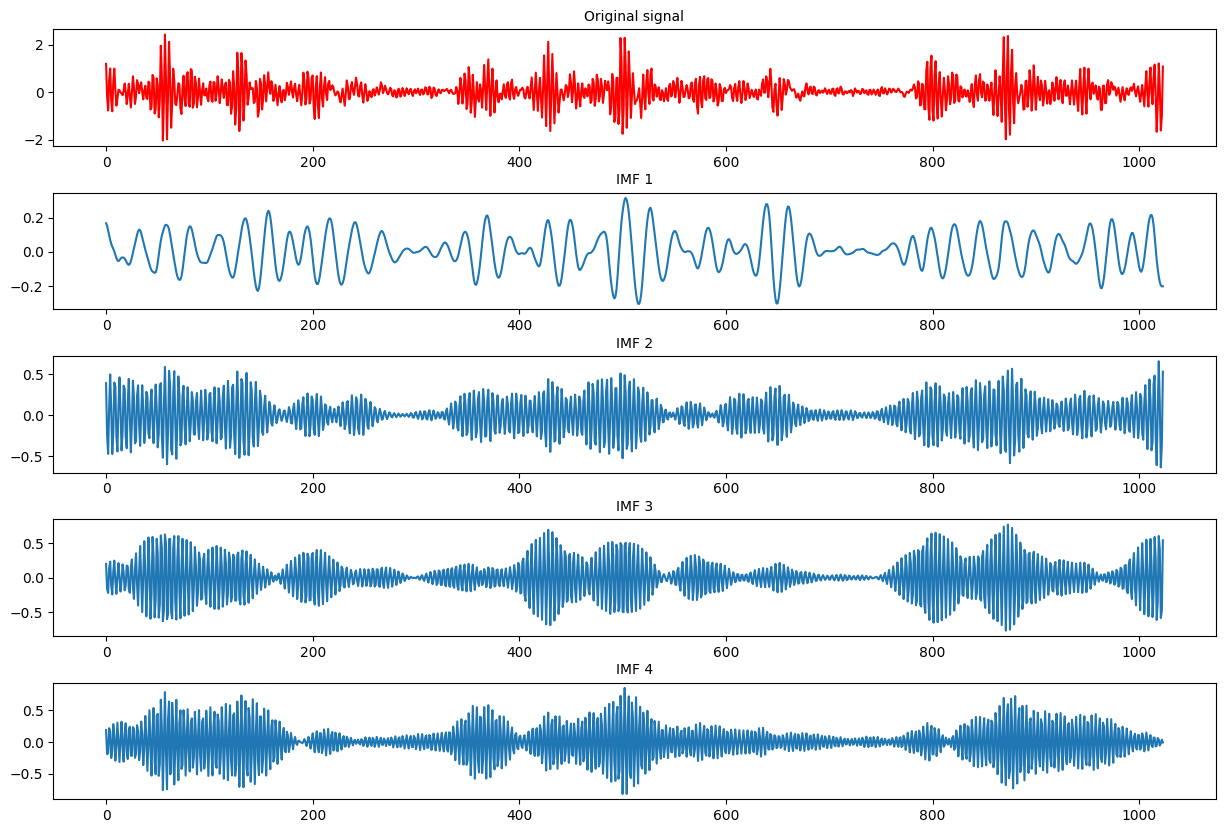

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

data = np.array(data_list2)
# alpha 惩罚系数；带宽限制经验取值为抽样点长度1.5-2.0倍.
# 惩罚系数越小，各IMF分量的带宽越大，过大的带宽会使得某些分量包含其他分量言号;
alpha = 2000
tau = 0 
#模态数量  分解模态（IMF）个数
K = 4
DC = 0 
init = 1 
tol = 1e-7
# -----测试信号及其参数--end----------

# Apply VMD
# 输出U是各个IMF分量，u_hat是各IMF的频谱，omega为各IMF的中心频率
u, u_hat, omega= VMD(data, alpha, tau, K, DC, init, tol)

#得到中心频率的数值
print(omega[-1])

# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(K+1, 1, 1)
plt.plot(data, 'r')
plt.title("Original signal", fontsize=10)

for num in range(K):
    plt.subplot(K+1, 1, num+2)
    plt.plot(u[num,:])
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()


[0.00149814 0.11901313 0.27355237 0.35452728]


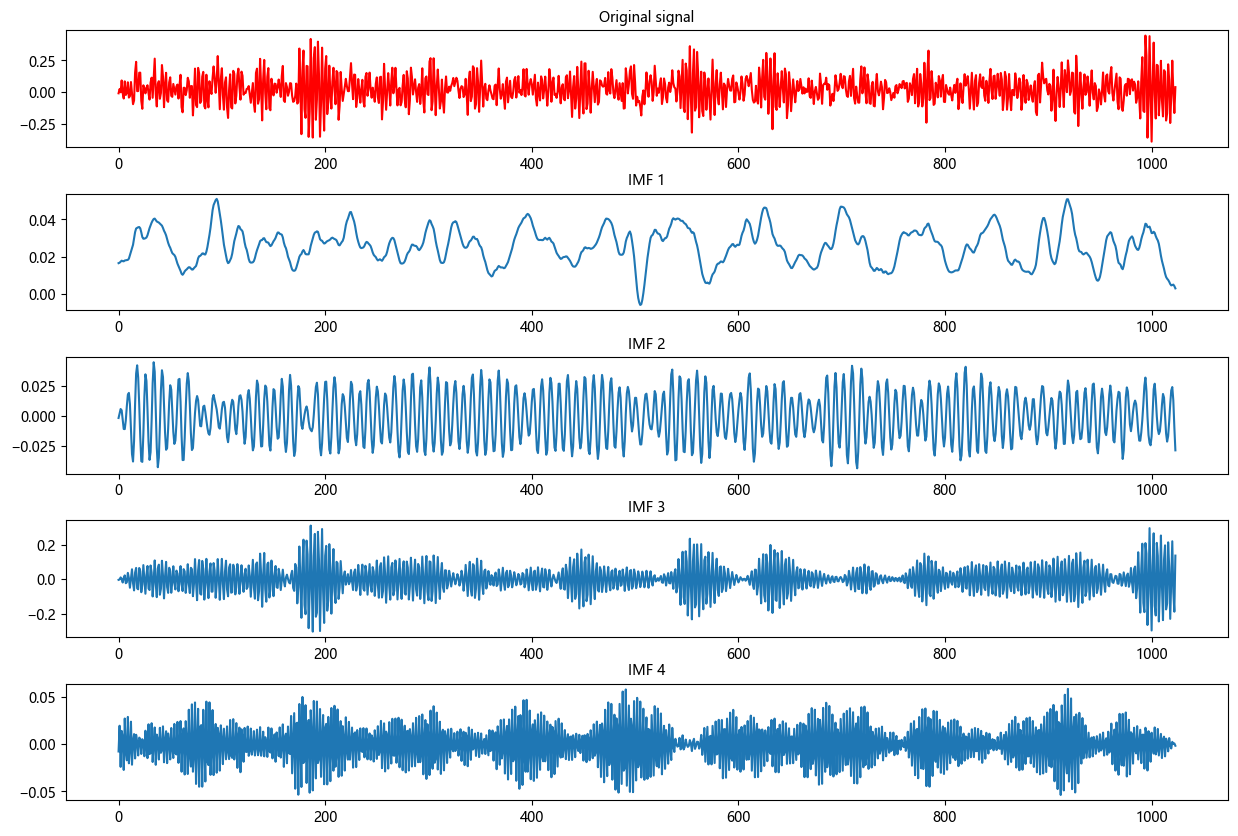

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

data = np.array(data_list3)
# alpha 惩罚系数；带宽限制经验取值为抽样点长度1.5-2.0倍.
# 惩罚系数越小，各IMF分量的带宽越大，过大的带宽会使得某些分量包含其他分量言号;
alpha = 2000
tau = 0 
#模态数量  分解模态（IMF）个数
K = 4
DC = 0 
init = 1 
tol = 1e-7
# -----测试信号及其参数--end----------

# Apply VMD
# 输出U是各个IMF分量，u_hat是各IMF的频谱，omega为各IMF的中心频率
u, u_hat, omega= VMD(data, alpha, tau, K, DC, init, tol)

#得到中心频率的数值
print(omega[-1])

# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(K+1, 1, 1)
plt.plot(data, 'r')
plt.title("Original signal", fontsize=10)

for num in range(K):
    plt.subplot(K+1, 1, num+2)
    plt.plot(u[num,:])
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

In [26]:
print(u.shape)
u

(4, 1024)


array([[ 0.16650614,  0.15149248,  0.12433907, ..., -0.19621492,
        -0.20255076, -0.20200157],
       [ 0.38949268, -0.24825965, -0.47016656, ..., -0.6336785 ,
        -0.35289563,  0.52994847],
       [ 0.20098838, -0.16382906, -0.22157693, ..., -0.58536287,
        -0.48066814,  0.54402384],
       [ 0.18834676, -0.19320997, -0.17836638, ..., -0.017979  ,
         0.03727886, -0.00825341]])